# Cleaning

## Introductory notes:
This notebook presents cleaning functionality:
* Resampling
* Bandpass and notch filtering
* Annotating bad channels 
* Annotating bad data spans
* Interpolating bad channels

Recommended reading:
1. [MNE: The Raw data structure](https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html)
2. [Learning eeg: artifacts](https://www.learningeeg.com/artifacts)
3. [MNE: Overview of artifact detection](https://mne.tools/stable/auto_tutorials/preprocessing/10_preprocessing_overview.html)
4. [MNE: Filtering and resampling data](https://mne.tools/stable/auto_tutorials/preprocessing/30_filtering_resampling.html) 
5. [MNE: Handling bad channels](https://mne.tools/stable/auto_tutorials/preprocessing/15_handling_bad_channels.html)
6. [MNE: Annotating continuous data](https://mne.tools/stable/auto_tutorials/raw/30_annotate_raw.html)

## Import data

### Import module

In [ ]:
from sleepeegpy.pipeline import CleaningPipe
import os

### Initialize CleaningPipe object

By default, all the input files are assumed to be saved in <b>input_files</b>, which will be created (if not already exists) in the notebook path. Change the following strings to use another path.
Changing the output directory is also optional.

In [ ]:
from os import makedirs

output_dir = "output_folder"  # Output path and name can be changed here
input_dir = "input_files"  # input files dir can be changed here
makedirs(input_dir, exist_ok=True)
makedirs(output_dir, exist_ok=True)

#### Add required files
* Put all your files in the input folder.
* Modify your eeg file name below. The file can be any format supported by the mne.read_raw() function.
* For more information about the supported formats, see [mne documentation](https://mne.tools/stable/generated/mne.io.Raw.html)

In [ ]:
eeg_file_name = "resampled_raw.fif"  # add your eeg_path here

In [ ]:
path_to_eeg = os.path.join(input_dir, eeg_file_name)
pipe = CleaningPipe(
    path_to_eeg=path_to_eeg,
    output_dir=output_dir,
)

## Resample

Resampling might be a long process (1+ hour), be patient. If you have enough RAM to load the signal, you may want to run `pipe.mne_raw.load_data()` before resampling. This will considerably speed up the process.

In [ ]:
pipe.resample(
    sfreq=250,  # Desired new sampling frequency
    n_jobs=-1,  # The number of jobs to run in parallel. If -1, it is set to the number of CPU cores.
    verbose=False,
)

## Filter

### Band-pass

In [ ]:
pipe.filter(
    l_freq=0.3,  # Lower pass-band edge in Hz.
    h_freq=None,  # Upper pass-band edge in Hz.
    n_jobs=-1,
)

### Notch

In [ ]:
pipe.notch(freqs="50s", n_jobs=-1)  # Remove 50 Hz and its harmonics.

## Select bad channels & annotate bad epochs

Create average reference projection. You can apply and remove the projection from inside the plot. Does not have an effect on the raw signal itself if `projection=True`.

In [ ]:
pipe.set_eeg_reference(ref_channels="average", projection=True)

### Select bad channels

In [ ]:
pipe.plot(
    save_bad_channels=True,  # Whether to save selected bad channels in a file
    save_annotations=False,  # Whether to save annotations in a file.
    # Whether to overwrite already saved bad_channels.txt or annotations.txt,
    # if set to False and there is already bad_channels.txt, new bad channels will be added to it.
    overwrite=False,
)
path = None

Another option is to use auto-detection of bad_channels (based on pyprep library).
This method generates a bad channel text file and returns the path.

To use it, uncomment the relevant line and run

In [ ]:
### uncomment to find bad channels automatically ###
# path = pipe.auto_detect_bad_channels()

If you want to continue with previously saved bad channels, use `pipe.read_bad_channels()`. The function will import the channels from the *bad_channels.txt* file.
Alternatively, if you already have another bad channels file, add your path

In [ ]:
pipe.read_bad_channels(
    # Path to the txt file with bad channel name per row.
    # If None, will try to import '{output_dir}/CleaningPipe/bad_channels.txt'
    path=path
)

### Interpolate bad channels

Interpolate bad channels using [spherical spline interpolation](https://mne.tools/stable/overview/implementation.html#bad-channel-repair-via-interpolation). Can be run from each analysis pipe.

In [ ]:
pipe.interpolate_bads(
    reset_bads=True  # Whether to set interpolated channels back as normal.
)

### Select bad epochs

In [ ]:
pipe.plot(
    save_bad_channels=False,  # Whether to save selected bad channels in a file
    save_annotations=True,  # Whether to save annotations in a file.
    # Whether to overwrite already saved bad_channels.txt or annotations.txt,
    # if set to False and there is already bad_channels.txt, new bad channels will be added.
    overwrite=False,
)

If you want to continue with previously saved annotations, use `pipe.read_annotations()`. The function will import the annotations from the *annotations.txt* file.
Alternatively, if you already another annotations.txt file, you can add your path

In [ ]:
pipe.read_annotations(
    # Path to txt file with mne-style annotations.
    # If None, will try to import '{output_dir}/annotations.txt'
    path=None
)

Another option is to use an auto set of annotations or use an existing file.
This method detects and sets annotations.

To use it, uncomment the relevant line and run

In [ ]:
# pipe.auto_set_annotations()

In [ ]:
pipe.plot()

## Save cleaned and annotated signal to the file

In [ ]:
pipe.save_raw("cleaned_raw.fif", overwrite=True)

## Additional functions

In [ ]:
pipe.sf, pipe.bad_data_percent

In [ ]:
pipe.save_bad_channels(overwrite=True)
pipe.save_annotations(overwrite=True)

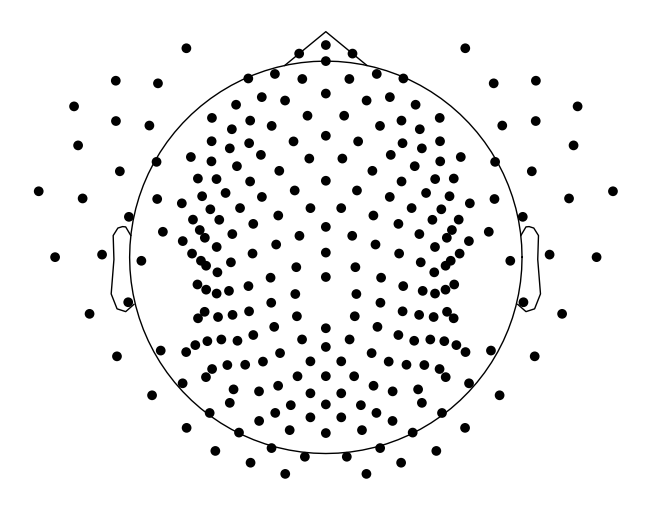

In [ ]:
_ = pipe.plot_sensors()